In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

In [12]:
def slater(x, k):
    n = len(k)
    xx, kk = np.meshgrid(x, k)
    S = np.exp(1j * xx * kk)
    return S.T

def psi(x, k):
    S = slater(x, k)
    return 1 / np.sqrt(math.factorial(x.size)) * np.linalg.det(S)

def get_k(N, L):
    return np.array([2 * np.pi / L * (i + (N-1)/2) for i in range(1, N+1)])

In [30]:
gridsize = 100
x = np.linspace(0, 1, gridsize)
y = np.linspace(0, 1, gridsize)
xx, yy = np.meshgrid(x, y)
phi = 2 * np.pi * xx
theta = 2 * np.pi * yy
R = 1.5 # whole donut radius
r = 0.55 # radius of the donut's mass
surfacex = np.cos(theta) * (R + r * np.cos(phi))
surfacey = np.sin(theta) * (R + r * np.cos(phi))
surfacez = r * np.sin(phi)

In [31]:
k = get_k(2, 1)
Z = np.empty((gridsize, gridsize))
for i in tqdm(range(gridsize), total=gridsize):
    for j in range(gridsize):
        p = np.abs(psi(np.array([x[i], y[j]]), k))**2
        Z[i, j] = p

100%|██████████| 100/100 [00:00<00:00, 143.68it/s]


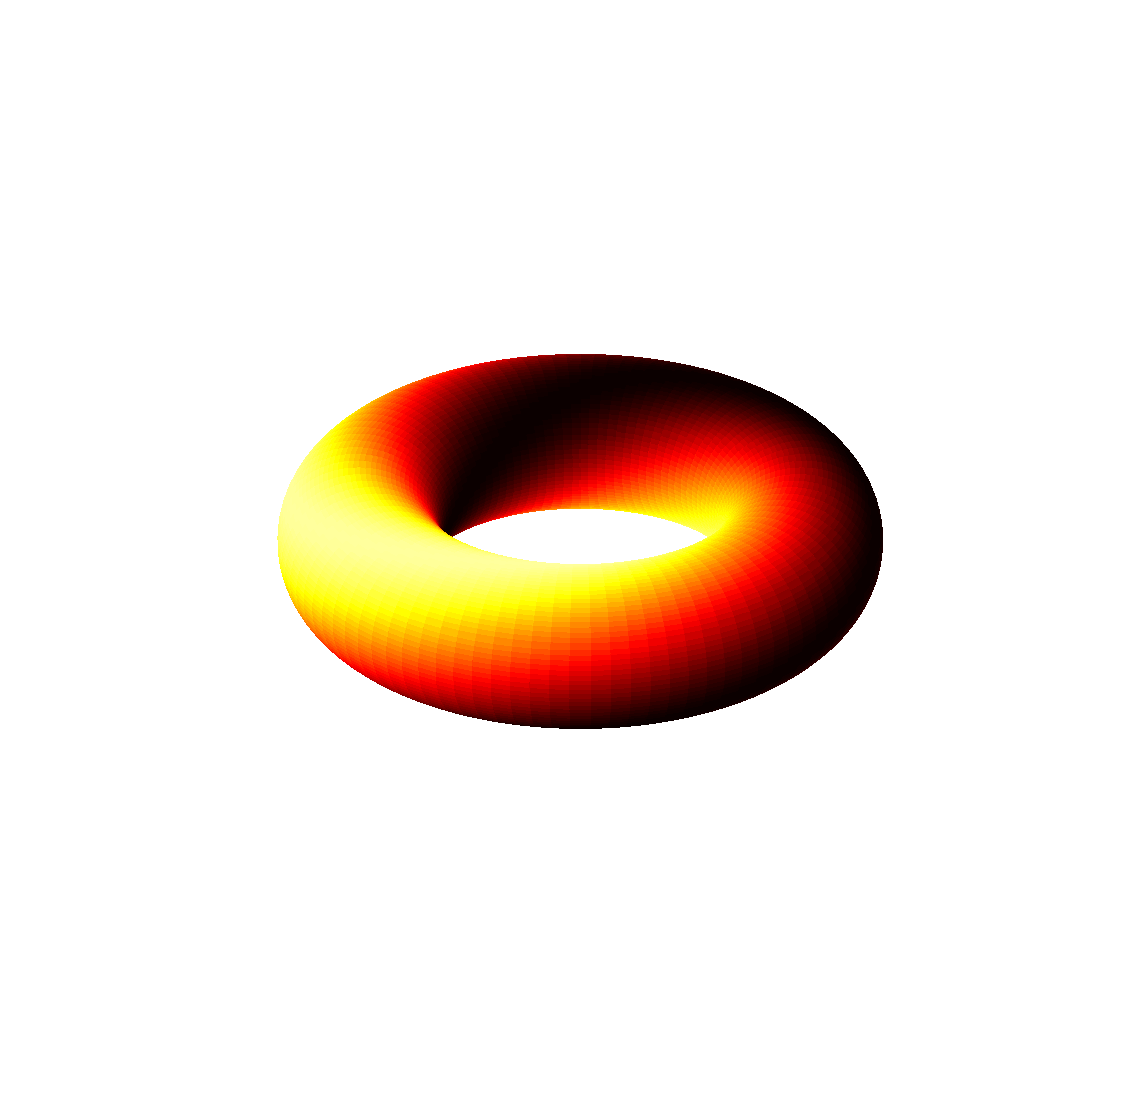

In [57]:
scaler = MinMaxScaler(feature_range=(0, 0.9))

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(surfacex, surfacey, surfacez, facecolors=plt.cm.hot(scaler.fit_transform(Z)), antialiased=False, rstride=1, cstride=1, vmin=-1, vmax=2, shade=False)
lim = (max(abs(max(np.max(surfacex), np.max(surfacey), np.max(surfacez))), abs(min(np.min(surfacex), np.min(surfacey), np.min(surfacez)))))
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
plt.axis('off')
plt.show()